In [1]:
import numpy as np
import pandas as pd 
import os
import itertools
import seaborn as sns

sns.set(color_codes=True)

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix 

In [2]:
import pandas as pd

# Load the data (ensure the path is correct)
heart_disease_data = pd.read_csv(r"C:\Users\ASUS\Downloads\cardio-vascular-disease-detection\cardio_train.csv", sep=";")

# Check the first few rows of the DataFrame to confirm structure
print(heart_disease_data.head())




FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ASUS\\Downloads\\cardio-vascular-disease-detection\\cardio_train.csv'

In [1]:
heart_disease_data.head()

NameError: name 'heart_disease_data' is not defined

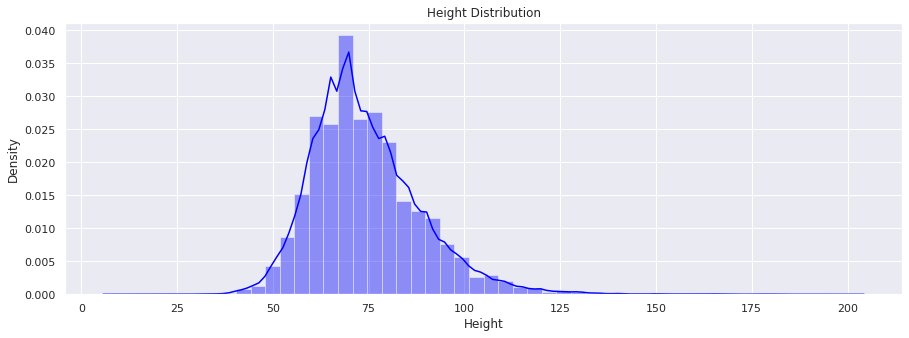

In [4]:
plt.figure(figsize=(15,5))
sns.distplot(heart_disease_data["weight"], color="blue")
plt.title("Height Distribution")
plt.ylabel("Density")
plt.xlabel("Height");

In [5]:
column_names = ["id","age","gender","height","weight",
                "ap_hi","ap_lo","cholesterol","gluc",
                "smoke","alco","active",'cardio']
for col in column_names:
    heart_disease_data[col] = pd.to_numeric(heart_disease_data[col])

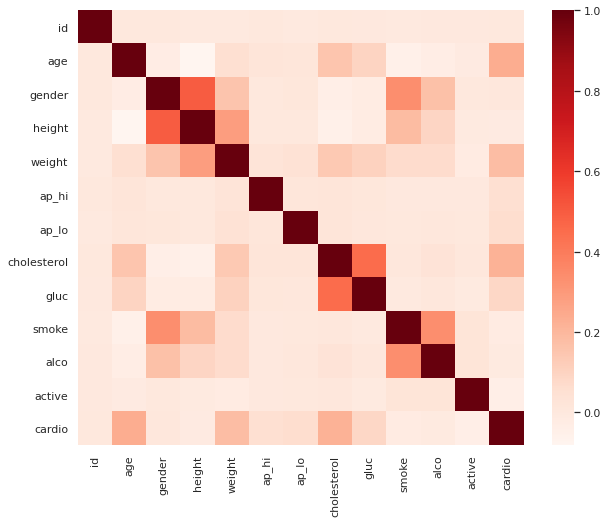

In [6]:
plt.figure(figsize=(10,8))
cor = heart_disease_data.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [7]:
y = heart_disease_data.cardio
X = heart_disease_data.drop("cardio", axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [8]:
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [9]:
metrics.accuracy_score(y_test, y_pred)

0.7244961762300995

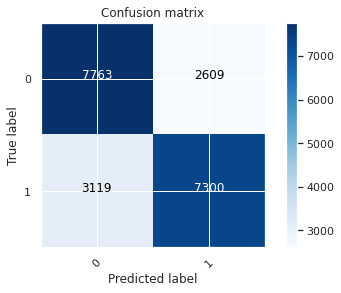

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = clf.predict(X_test)
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [11]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=7, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=7, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
              subsample=1, tree_method=None, validate_parameters=False,
              verbosity=0)

In [12]:
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7304602953200904

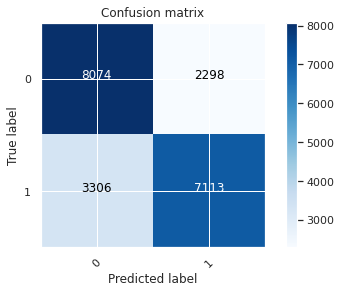

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test)
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = range(2)) 